Installing Dependencies

In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

Load Model

In [5]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in C:\Users\Devansh Gupta/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-9-21 Python-3.10.5 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Make Detections

In [18]:
# Images
img = "img.jpeg"

# Inference
results = model(img)

# Results
results.print()

UnidentifiedImageError: cannot identify image file 'vid.mp4'

In [16]:
# %matplotlib inline
# plt.imshow(np.squeeze(results.render()))
# plt.show()

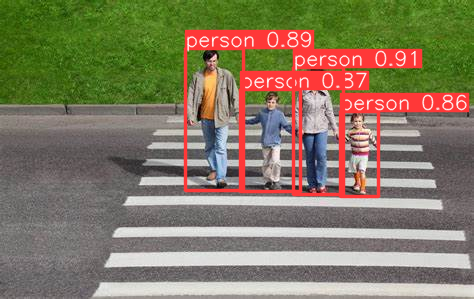

In [17]:
results.show()

Real Time Detections

In [20]:
capture=cv.VideoCapture(0)
# capture=cv.VideoCapture(0)
capture.set(3, 640)
capture.set(4, 480)
capture.set(10, 70)  
while capture.isOpened():
    ret, frame = capture.read()

    # Inference
    results = model(frame)
    
    cv.imshow('Video', np.squeeze(results.render()))

    if cv.waitKey(10) & 0xFF == ord('q'):
            break

capture.release()
cv.destroyAllWindows()

KeyboardInterrupt: 